# Load and Read Dataset (CIC-DDoS2019 - Day 2)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from a CSV file
df = pd.read_csv('Cleaned_Dataset.csv')

df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,...,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Fwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,act_data_pkt_fwd,min_seg_size_forward,Label
0,-0.377324,-0.038260,-0.063582,-0.066501,-0.402449,-0.341062,-0.411850,-0.294984,-0.344538,-0.361440,...,-0.199704,-0.076785,-0.373939,-0.411850,-0.038260,-0.066501,-0.063582,-0.252015,0.019717,0
1,-0.370125,-0.036143,-0.063582,-0.066461,-0.396976,-0.468869,-0.471232,-0.295012,-0.344858,-0.342803,...,-0.234456,-0.077365,-0.461230,-0.471232,-0.036143,-0.066461,-0.063582,-0.252015,-0.104404,0
2,-0.376523,-0.038260,-0.063582,-0.066474,-0.398800,-0.335118,-0.405911,-0.295003,-0.344739,-0.357764,...,-0.296376,-0.077979,-0.408517,-0.405911,-0.038260,-0.066474,-0.063582,-0.252015,0.019717,0
3,-0.150059,-0.038260,0.034580,-0.067067,-0.480894,-0.468869,-0.539521,-0.295013,-0.344900,-0.015567,...,-0.336036,-0.078089,-0.539199,-0.539521,-0.038260,-0.067067,0.034580,-0.265156,0.019717,0
4,-0.377325,-0.038260,-0.063582,-0.066606,-0.417043,-0.364840,-0.435602,-0.294995,-0.344537,-0.361446,...,-0.296376,-0.077979,-0.433941,-0.435602,-0.038260,-0.066606,-0.063582,-0.252015,0.019717,0


# Data Splitting (70:30)

In [2]:
from sklearn.model_selection import train_test_split

# First, separate the features and the target
X = df.drop(' Label', axis=1)  # Features
y = df[' Label']               # Target

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print the shapes of the training and test sets
print("Training set (X):", X_train.shape)
print("Training set (y):", y_train.shape)
print("Test set (X):", X_test.shape)
print("Test set (y):", y_test.shape)

Training set (X): (9800, 33)
Training set (y): (9800,)
Test set (X): (4200, 33)
Test set (y): (4200,)


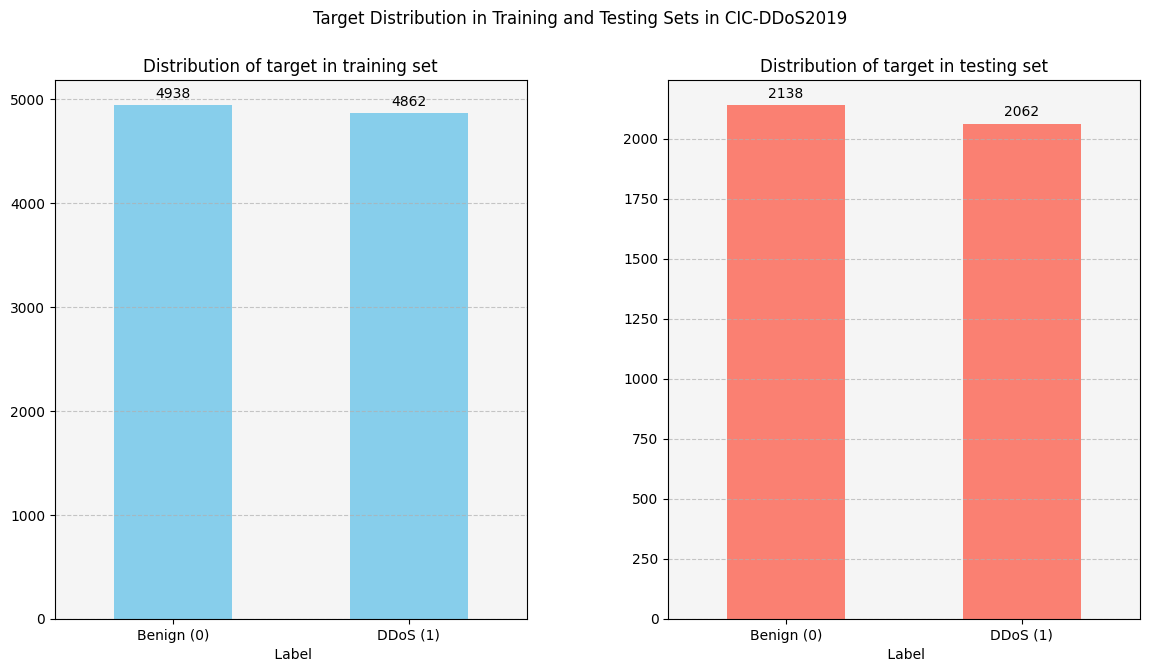

In [3]:
import matplotlib.pyplot as plt

# Plot the distribution of the target in the training set
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
train_counts = y_train.value_counts()
train_bar = train_counts.plot(kind='bar', title='Distribution of target in training set', color='skyblue')
plt.xticks(rotation=0)  # Rotates X-axis labels for better visibility if needed
for i, value in enumerate(train_counts):
    plt.text(i, value + value * 0.01, f'{value}', ha='center', va='bottom')
    plt.xticks([0, 1], [ 'Benign (0)','DDoS (1)'])  # Adjusting based on your provided graph

plt.subplot(1, 2, 2)
test_counts = y_test.value_counts()
test_bar = test_counts.plot(kind='bar', title='Distribution of target in testing set', color='salmon')
plt.xticks(rotation=0)  # Rotates X-axis labels for better visibility if needed
for i, value in enumerate(test_counts):
    plt.text(i, value + value * 0.01, f'{value}', ha='center', va='bottom')
    plt.xticks([0, 1],  [  'Benign (0)','DDoS (1)'])  # Adjusting based on your provided graph

# Style enhancements
plt.subplots_adjust(wspace=0.3)  # Adjusts the space between the two subplots
plt.suptitle('Target Distribution in Training and Testing Sets in CIC-DDoS2019')  # Adds a central title if desired

# Adding grid lines for better readability
train_bar.grid(axis='y', linestyle='--', alpha=0.7)
test_bar.grid(axis='y', linestyle='--', alpha=0.7)

# Set the background color
plt.subplot(1, 2, 1).set_facecolor('whitesmoke')
plt.subplot(1, 2, 2).set_facecolor('whitesmoke')

plt.show()


# Feature Selection PCA (70:30)

In [4]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=25)

# Fit PCA on the training data
pca.fit(X_train)

# Transform the data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shape of the data after PCA
print("Training set after PCA (X):", X_train_pca.shape)
print("Test set after PCA (X):", X_test_pca.shape)

Training set after PCA (X): (9800, 25)
Test set after PCA (X): (4200, 25)


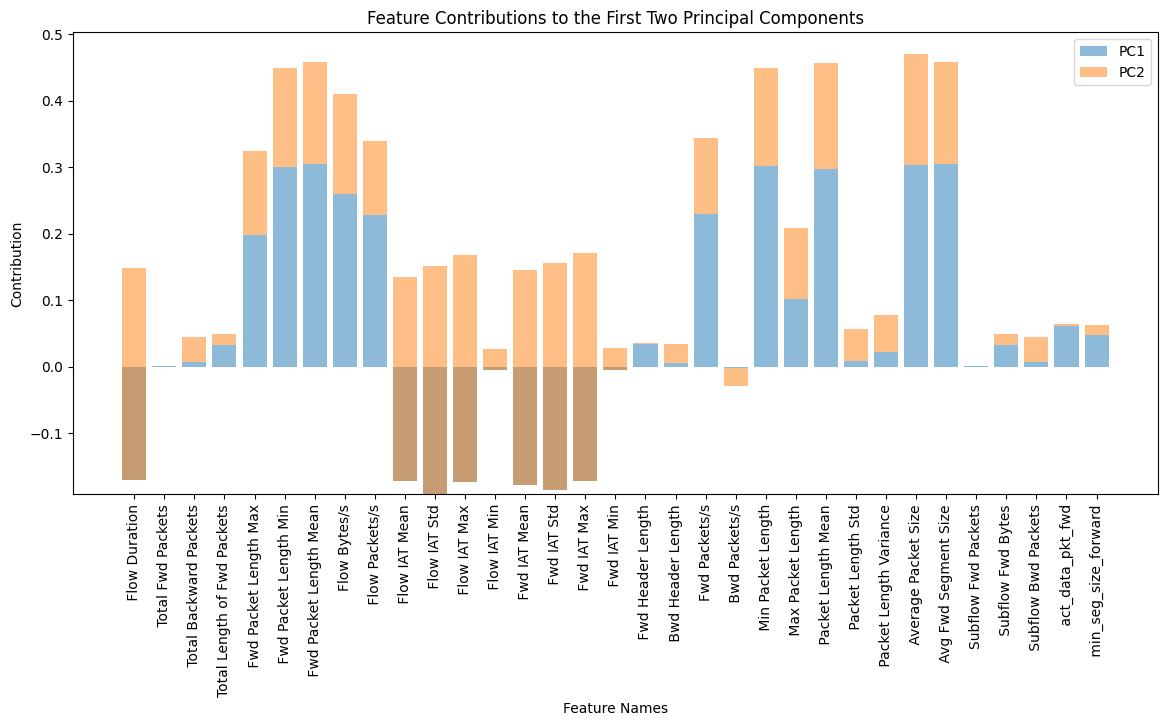

In [5]:
# Assuming X_train is a DataFrame and y_train is a Series
feature_names = X_train.columns.tolist()
pca_components = pd.DataFrame(pca.components_, columns=feature_names)

# Plot contributions of each feature to the first two principal components
pc1_contributions = pca_components.iloc[0]
pc2_contributions = pca_components.iloc[1]

plt.figure(figsize=(14, 6))
plt.bar(feature_names, pc1_contributions, alpha=0.5, label='PC1')
plt.bar(feature_names, pc2_contributions, alpha=0.5, label='PC2', bottom=pc1_contributions)
plt.title('Feature Contributions to the First Two Principal Components')
plt.xlabel('Feature Names')
plt.ylabel('Contribution')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Feature Selection LDA (70:30)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Assume X_train is a DataFrame with feature names
feature_names = X_train.columns

# Initialize LDA
lda = LDA(n_components=1)  # n_components should be less than or equal to min(n_classes - 1, n_features)

# Fit LDA on the training data
lda.fit(X_train, y_train)

# Transform the data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Print the shape of the data after LDA
print("Training set after LDA (X):", X_train_lda.shape)
print("Test set after LDA (X):", X_test_lda.shape)



Training set after LDA (X): (9800, 1)
Test set after LDA (X): (4200, 1)


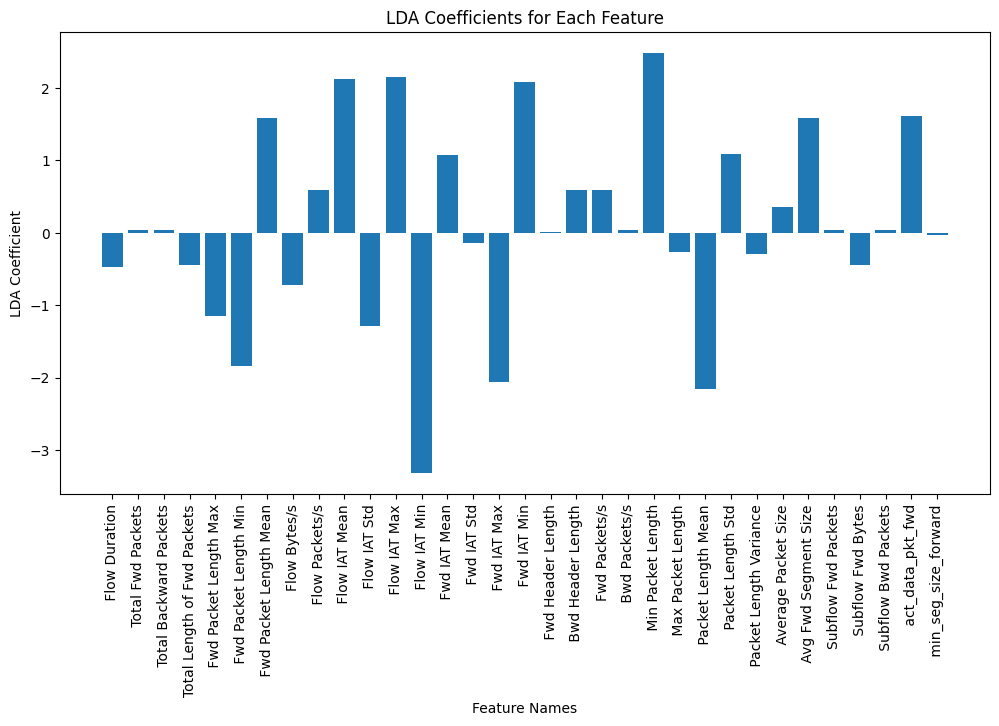

In [7]:
# Get the coefficients of the linear discriminants
lda_coefficients = lda.coef_[0]

# Create a bar plot to visualize the coefficients
plt.figure(figsize=(12, 6))
plt.bar(feature_names, lda_coefficients)
plt.xlabel('Feature Names')
plt.ylabel('LDA Coefficient')
plt.title('LDA Coefficients for Each Feature')
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show()

# SVM (70:30)

In [8]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Implementation : Support Vector Machine KERNEL: LINEAR

 ### Implementation of SVM (Kernel-Linear) -Train and Test Set - Without Feature Selection. - DEFAULT

#### Default Parameter [kernel = linear] - TRAIN

In [9]:
# Initialize an SVM with a linear kernel
svm_train_linear_wf = SVC(kernel="linear")

# Measure training time
start_time = time.time()
svm_train_linear_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_wf = svm_train_linear_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_wf)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.5138 seconds
Prediction time: 0.6988 seconds
Training Accuracy: 0.8449
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4938
           1       0.92      0.75      0.83      4862

    accuracy                           0.84      9800
   macro avg       0.86      0.84      0.84      9800
weighted avg       0.86      0.84      0.84      9800



#### Default Parameter [kernel = linear] - TEST

In [10]:
# Initialize an SVM with a linear kernel
svm_test_linear_wf = SVC(kernel="linear")

start_time = time.time()
svm_test_linear_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_wf = svm_test_linear_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_wf = confusion_matrix(y_test, y_test_pred_linear_wf)

Testing time: 0.4052 seconds
Prediction time: 0.1232 seconds
Testing Accuracy: 0.8740
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2062
           1       0.95      0.80      0.87      2138

    accuracy                           0.87      4200
   macro avg       0.88      0.88      0.87      4200
weighted avg       0.88      0.87      0.87      4200



### Implementation of SVM (Kernel-Linear) -Train and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [11]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [12]:
# Define the parameter grid
param_grid = {
    'C': [1, 10]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)
halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel Linear without Feature Selection : {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Linear without Feature Selection : {'C': 10}


#### Tuning Parameter [kernel: linear, C=10] - TRAIN

In [13]:
# Initialize an SVM with a linear kernel
svm_train_linear_wf = SVC(kernel="linear", C=10)

# Measure training time
start_time = time.time()
svm_train_linear_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_wf = svm_train_linear_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 9.4899 seconds
Prediction time: 0.7085 seconds
Training Accuracy: 0.8628
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4938
           1       0.93      0.78      0.85      4862

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.87      0.86      0.86      9800



#### Tuning Parameter [kernel: linear, C=10] - TEST

In [14]:
# Initialize an SVM with a linear kernel
svm_test_linear_wf = SVC(kernel="linear", C=10)

start_time = time.time()
svm_test_linear_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_wf = svm_test_linear_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_wf = confusion_matrix(y_test, y_test_pred_linear_wf)

Testing time: 0.9189 seconds
Prediction time: 0.1131 seconds
Testing Accuracy: 0.8886
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2062
           1       0.93      0.85      0.89      2138

    accuracy                           0.89      4200
   macro avg       0.89      0.89      0.89      4200
weighted avg       0.89      0.89      0.89      4200



### Implementation of SVM (Kernel-Linear) -Train Set and Test Set- With PCA - DEFAULT

#### Default Parameter [kernel = linear] - TRAIN

In [15]:
# Initialize an SVM with a linear kernel
svm_train_linear_f = SVC(kernel="linear")

# Measure training time
start_time = time.time()
svm_train_linear_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_f = svm_train_linear_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 3.9833 seconds
Prediction time: 0.7634 seconds
Training Accuracy: 0.8476
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4938
           1       0.93      0.75      0.83      4862

    accuracy                           0.85      9800
   macro avg       0.86      0.85      0.85      9800
weighted avg       0.86      0.85      0.85      9800



#### Default Parameter [kernel = linear] - TEST

In [16]:
# Initialize an SVM with a linear kernel
svm_test_linear_f = SVC(kernel="linear")

# Measure testing time
start_time = time.time()
svm_test_linear_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_f = svm_test_linear_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_f)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_f = confusion_matrix(y_test, y_test_pred_linear_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.4443 seconds
Prediction time: 0.1286 seconds
Testing Accuracy: 0.8733
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2062
           1       0.95      0.80      0.86      2138

    accuracy                           0.87      4200
   macro avg       0.88      0.87      0.87      4200
weighted avg       0.88      0.87      0.87      4200



### Implementation of SVM (Kernel-Linear) -Train and Test Set - With PCA. - HALVING GRID SEARCH

In [17]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [18]:
# Define the parameter grid
param_grid = {
    'C': [1, 10]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)
halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel Linear With PCA : {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Linear With PCA : {'C': 10}


#### Tuning Parameter [kernel: linear, C=10] - TRAIN

In [19]:
# Initialize an SVM with a linear kernel
svm_train_linear_f = SVC(kernel="linear", C=10)

# Measure training time
start_time = time.time()
svm_train_linear_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_f = svm_train_linear_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 9.7221 seconds
Prediction time: 0.7802 seconds
Training Accuracy: 0.8620
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4938
           1       0.94      0.77      0.85      4862

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.87      0.86      0.86      9800



#### Tuning Parameter [kernel: linear, C=10] - TEST

In [20]:
# Initialize an SVM with a linear kernel
svm_test_linear_f = SVC(kernel="linear", C=10)

# Measure testing time
start_time = time.time()
svm_test_linear_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_f = svm_test_linear_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_f)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_f = confusion_matrix(y_test, y_test_pred_linear_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 1.1110 seconds
Prediction time: 0.1280 seconds
Testing Accuracy: 0.8864
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2062
           1       0.94      0.83      0.88      2138

    accuracy                           0.89      4200
   macro avg       0.89      0.89      0.89      4200
weighted avg       0.89      0.89      0.89      4200



## Implementation : Support Vector Machine KERNEL: POLYNOMIAL

### Implementation of SVM (Kernel- Polynomial) Train and Test Set - Without Feature Selection - DEFAULT

#### Default Parameter [kernel="poly"] - TRAIN

In [21]:
# Initialize an SVM with a poly kernel
svm_train_poly_wf = SVC(kernel="poly")

# Measure training time
start_time = time.time()
svm_train_poly_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_wf = svm_train_poly_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.7708 seconds
Prediction time: 0.9647 seconds
Training Accuracy: 0.8209
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      4938
           1       0.99      0.65      0.78      4862

    accuracy                           0.82      9800
   macro avg       0.87      0.82      0.81      9800
weighted avg       0.86      0.82      0.82      9800



#### Default Parameter [kernel="poly"] - TEST

In [22]:
# Initialize an SVM with a poly kernel
svm_test_poly_wf = SVC(kernel="poly")

start_time = time.time()
svm_test_poly_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_wf = svm_test_poly_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_wf)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_wf = confusion_matrix(y_test, y_test_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)


Testing time: 0.6016 seconds
Prediction time: 0.2171 seconds
Testing Accuracy: 0.7988
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2062
           1       1.00      0.61      0.75      2138

    accuracy                           0.80      4200
   macro avg       0.85      0.80      0.79      4200
weighted avg       0.86      0.80      0.79      4200



### Implementation of SVM (Kernel-Poly) -Train and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [23]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
    'degree': [2, 3]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel Polynomial Without Feature Selection: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Polynomial Without Feature Selection: {'C': 10, 'degree': 3}


#### Tuning Parameter [kernel: poly, C=10, 'degree': 3] - TRAIN

In [24]:
# Initialize an SVM with a poly kernel
svm_train_poly_wf = SVC(kernel="poly", C=10, degree= 3)

# Measure training time
start_time = time.time()
svm_train_poly_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_wf = svm_train_poly_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.8480 seconds
Prediction time: 0.6938 seconds
Training Accuracy: 0.8847
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4938
           1       0.98      0.78      0.87      4862

    accuracy                           0.88      9800
   macro avg       0.90      0.88      0.88      9800
weighted avg       0.90      0.88      0.88      9800



#### Tuning Parameter [kernel: poly, C=10, 'degree': 3] - TEST

In [25]:
# Initialize an SVM with a poly kernel
svm_test_poly_wf = SVC(kernel="poly",C=10, degree= 3)

start_time = time.time()
svm_test_poly_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_wf = svm_test_poly_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_wf)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_wf = confusion_matrix(y_test, y_test_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)


Testing time: 0.4730 seconds
Prediction time: 0.1478 seconds
Testing Accuracy: 0.8529
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2062
           1       0.99      0.71      0.83      2138

    accuracy                           0.85      4200
   macro avg       0.88      0.86      0.85      4200
weighted avg       0.88      0.85      0.85      4200



### Implementation of SVM (Kernel-Polynomial) -Train and Test Set - With PCA. - DEFAULT

#### Default Parameter [kernel="poly"] - TRAIN

In [26]:
# Train the SVM classifier with a polynomial kernel on the selected features
svm_train_poly_f = SVC(kernel="poly")

# Measure testing time
start_time = time.time()
svm_train_poly_f .fit(X_train_pca, y_train)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_f = svm_train_poly_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.8480 seconds
Prediction time: 1.0531 seconds
Training Accuracy: 0.8202
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      4938
           1       0.99      0.64      0.78      4862

    accuracy                           0.82      9800
   macro avg       0.86      0.82      0.81      9800
weighted avg       0.86      0.82      0.81      9800



#### Default Parameter [kernel="poly"] - TEST

In [27]:
# Initialize an SVM with a poly kernel
svm_test_poly_f = SVC(kernel="poly")

# Measure testing time
start_time = time.time()
svm_test_poly_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_f = svm_test_poly_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_f)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_f = confusion_matrix(y_test, y_test_pred_poly_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.4256 seconds
Prediction time: 0.1980 seconds
Testing Accuracy: 0.7986
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2062
           1       1.00      0.61      0.75      2138

    accuracy                           0.80      4200
   macro avg       0.85      0.80      0.79      4200
weighted avg       0.86      0.80      0.79      4200



### Implementation of SVM (Kernel-Poly) -Train and Test Set - With PCA - HALVING GRID SEARCH

In [28]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
    'degree': [2, 3]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel Polynomial With PCA: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Polynomial With PCA: {'C': 10, 'degree': 3}


#### Tuning Parameter [kernel: poly,'C': 10, 'degree': 3}] - TRAIN

In [29]:
# Train the SVM classifier with a polynomial kernel on the selected features
svm_train_poly_f = SVC(kernel="poly",degree=3, C=10)

# Measure testing time
start_time = time.time()
svm_train_poly_f .fit(X_train_pca, y_train)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_f = svm_train_poly_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.8480 seconds
Prediction time: 0.8213 seconds
Training Accuracy: 0.8866
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      4938
           1       0.98      0.79      0.87      4862

    accuracy                           0.89      9800
   macro avg       0.90      0.89      0.89      9800
weighted avg       0.90      0.89      0.89      9800



#### Tuning Parameter [kernel: poly,'C': 10, 'degree': 3}] - TEST

In [30]:
# Initialize an SVM with a poly kernel
svm_test_poly_f = SVC(kernel="poly",degree=3, C=10)

# Measure testing time
start_time = time.time()
svm_test_poly_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_f = svm_test_poly_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_f)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_f = confusion_matrix(y_test, y_test_pred_poly_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.4268 seconds
Prediction time: 0.1627 seconds
Testing Accuracy: 0.8629
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      2062
           1       0.99      0.74      0.85      2138

    accuracy                           0.86      4200
   macro avg       0.89      0.87      0.86      4200
weighted avg       0.89      0.86      0.86      4200



## Implementation : Support Vector Machine KERNEL: RBF

### Implementation of SVM (Kernel - RBF) - Train and Test Set - Without Feature Selection - DEFAULT

#### Default Parameter [kernel = rbf] - TRAIN

In [31]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_wf = SVC(kernel="rbf")

# Measure training time
start_time = time.time()
svm_train_rbf_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_wf = svm_train_rbf_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 2.6864 seconds
Prediction time: 2.5794 seconds
Training Accuracy: 0.9097
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4938
           1       0.94      0.87      0.91      4862

    accuracy                           0.91      9800
   macro avg       0.91      0.91      0.91      9800
weighted avg       0.91      0.91      0.91      9800



#### Default Parameter [kernel = rbf] - TEST

In [32]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_wf = SVC(kernel="rbf")

start_time = time.time()
svm_test_rbf_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_wf = svm_test_rbf_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_wf = confusion_matrix(y_test, y_test_pred_rbf_wf)

Testing time: 0.3349 seconds
Prediction time: 0.5295 seconds
Testing Accuracy: 0.8881
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2062
           1       0.95      0.82      0.88      2138

    accuracy                           0.89      4200
   macro avg       0.90      0.89      0.89      4200
weighted avg       0.90      0.89      0.89      4200



### Implementation of SVM (Kernel RBF) - Train and Test Set - Without Feature Selection - HALVING GRID SEARCH

In [33]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
     'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

In [34]:
halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel RBF Without Feature Selection: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel RBF Without Feature Selection: {'C': 10, 'gamma': 'scale'}


#### Tuning Parameter [kernel: rbf,'C': 10, 'gamma': 'scale'] - TRAIN

In [35]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_wf = SVC(kernel="rbf", C=10, gamma='scale')

# Measure training time
start_time = time.time()
svm_train_rbf_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_wf = svm_train_rbf_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.8872 seconds
Prediction time: 1.7744 seconds
Training Accuracy: 0.9552
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4938
           1       0.96      0.94      0.95      4862

    accuracy                           0.96      9800
   macro avg       0.96      0.96      0.96      9800
weighted avg       0.96      0.96      0.96      9800



#### Tuning Parameter [kernel: rbf,'C': 10, 'gamma': 'scale'] - TEST

In [36]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_wf = SVC(kernel="rbf", C=10, gamma='scale')

start_time = time.time()
svm_test_rbf_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_wf = svm_test_rbf_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_wf = confusion_matrix(y_test, y_test_pred_rbf_wf)


Testing time: 0.2939 seconds
Prediction time: 0.4086 seconds
Testing Accuracy: 0.9260
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2062
           1       0.96      0.90      0.92      2138

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



### Implementation of SVM (Kernel-RBF) using PCA - Train and Test set - DEFAULT





#### Default Parameter [kernel=rbf] - TRAIN

In [37]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_f = SVC(kernel="rbf")

# Measure training time
start_time = time.time()
svm_train_rbf_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_f = svm_train_rbf_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.8025 seconds
Prediction time: 2.5951 seconds
Training Accuracy: 0.9097
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4938
           1       0.94      0.87      0.91      4862

    accuracy                           0.91      9800
   macro avg       0.91      0.91      0.91      9800
weighted avg       0.91      0.91      0.91      9800



#### Default Parameter [kernel=rbf] - TEST

In [38]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_f = SVC(kernel="rbf")

# Measure testing time
start_time = time.time()
svm_test_rbf_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_f = svm_test_rbf_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_f)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_f = confusion_matrix(y_test, y_test_pred_rbf_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.3035 seconds
Prediction time: 0.5511 seconds
Testing Accuracy: 0.8881
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2062
           1       0.95      0.82      0.88      2138

    accuracy                           0.89      4200
   macro avg       0.90      0.89      0.89      4200
weighted avg       0.90      0.89      0.89      4200



### Implementation of SVM (Kernel-RBF) using PCA - Train and Test set - HALVING GRID SEARCH





In [39]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
     'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel RBF using PCA: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel RBF using PCA: {'C': 10, 'gamma': 'auto'}


#### Tuning Parameter [kernel=rbf, C=10, gamma=auto] - TRAIN

In [40]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_f = SVC(kernel="rbf", C=10, gamma='auto')

# Measure training time
start_time = time.time()
svm_train_rbf_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_f = svm_train_rbf_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.3409 seconds
Prediction time: 1.6855 seconds
Training Accuracy: 0.9599
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4938
           1       0.96      0.96      0.96      4862

    accuracy                           0.96      9800
   macro avg       0.96      0.96      0.96      9800
weighted avg       0.96      0.96      0.96      9800



#### Tuning Parameter [kernel=rbf, C=10, gamma=auto] - TEST

In [41]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_f = SVC(kernel="rbf", C=10, gamma='auto')

# Measure testing time
start_time = time.time()
svm_test_rbf_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_f = svm_test_rbf_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_f)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_f = confusion_matrix(y_test, y_test_pred_rbf_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.2407 seconds
Prediction time: 0.3642 seconds
Testing Accuracy: 0.9467
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2062
           1       0.97      0.93      0.95      2138

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



# KNN (70:30)

In [42]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Implementation for KNN (Euclidean)

### Implementation of KNN (Euclidean) -- Train and Test Set  Without Feature Selection.- DEFAULT

#### Default Parameter [metric=Euclidean] -TRAIN

In [43]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_wf = KNeighborsClassifier(n_neighbors=99, metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_wf = knn_train_euclidean_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0100 seconds
Prediction time: 0.6777 seconds
Training Accuracy: 0.9451
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4938
           1       0.94      0.95      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Default Parameter [metric=Euclidean] -TEST

In [44]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_wf = KNeighborsClassifier(n_neighbors=99,metric='euclidean', p=2)

start_time = time.time()
knn_test_euclidean_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_wf = knn_test_euclidean_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_wf)


# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_wf = confusion_matrix(y_test, y_test_pred_euclidean_wf)

Testing time: 0.0040 seconds
Prediction time: 0.3064 seconds
Testing Accuracy: 0.9348
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2062
           1       0.94      0.93      0.94      2138

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



### Implementation of KNN (Euclidean) -- Train and Test Set  Without Feature Selection.- HALVING GRID SEARCH

In [45]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [46]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['euclidean']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 95}


####  Tuning Parameter [metric=Euclidean,'n_neighbors': 95] -TRAIN

In [47]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_wf = KNeighborsClassifier(n_neighbors=95, metric='euclidean', p=2)

# Measure training time
start_time = time.time()
knn_train_euclidean_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_wf = knn_train_euclidean_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0050 seconds
Prediction time: 0.5524 seconds
Training Accuracy: 0.9457
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4938
           1       0.94      0.96      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Tuning Parameter [metric=Euclidean'n_neighbors': 95] -TEST

In [48]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_wf = KNeighborsClassifier(n_neighbors=95,metric='euclidean', p=2)

start_time = time.time()
knn_test_euclidean_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_wf = knn_test_euclidean_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_wf)


# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_wf = confusion_matrix(y_test, y_test_pred_euclidean_wf)

Testing time: 0.0030 seconds
Prediction time: 0.3315 seconds
Testing Accuracy: 0.9355
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2062
           1       0.94      0.94      0.94      2138

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



### Implementation of KNN (Metric-euclidean) -Train Set and Test Set - With PCA. - DEFAULT

#### Default Parameter [metric=Euclidean] -TRAIN

In [49]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_f = KNeighborsClassifier(n_neighbors=99,metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_f = knn_train_euclidean_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0030 seconds
Prediction time: 0.7114 seconds
Training Accuracy: 0.9452
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4938
           1       0.94      0.95      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Default Parameter [metric=Euclidean] -TEST

In [50]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_f = KNeighborsClassifier(n_neighbors=99,metric='euclidean', p=2) #sqrt

# Measure testing time
start_time = time.time()
knn_test_euclidean_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_f = knn_test_euclidean_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_f)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_f = confusion_matrix(y_test, y_test_pred_euclidean_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0020 seconds
Prediction time: 0.2727 seconds
Testing Accuracy: 0.9350
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2062
           1       0.94      0.93      0.94      2138

    accuracy                           0.94      4200
   macro avg       0.93      0.94      0.93      4200
weighted avg       0.94      0.94      0.94      4200



### Implementation of KNN (Euclidean) -- Train and Test Set  With PCA.- HALVING GRID SEARCH

In [51]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['euclidean']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

In [52]:
halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 95}


####  Tuning Parameter [metric=Euclidean,'n_neighbors': 95] -TRAIN

In [53]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_f = KNeighborsClassifier(n_neighbors=95,metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_f = knn_train_euclidean_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0020 seconds
Prediction time: 0.5492 seconds
Training Accuracy: 0.9457
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4938
           1       0.94      0.96      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Tuning Parameter [metric=Euclidean'n_neighbors': 95] -TEST

In [54]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_f = KNeighborsClassifier(n_neighbors=95,metric='euclidean', p=2) #sqrt

# Measure testing time
start_time = time.time()
knn_test_euclidean_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_f = knn_test_euclidean_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_f)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_f = confusion_matrix(y_test, y_test_pred_euclidean_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0020 seconds
Prediction time: 0.2816 seconds
Testing Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2062
           1       0.94      0.94      0.94      2138

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



## Implementation for KNN (Manhattan)

### Implementation of KNN (Manhattan) -- Train and Test Set  Without Feature Selection.- DEFAULT

#### Default Parameter [metric-Manhattan] -TRAIN

In [55]:
# Initialize an knn with a manhattan Metric
knn_train_manhattan_wf = KNeighborsClassifier(n_neighbors=99,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_wf = knn_train_manhattan_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0060 seconds
Prediction time: 0.8113 seconds
Training Accuracy: 0.9555
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4938
           1       0.95      0.96      0.96      4862

    accuracy                           0.96      9800
   macro avg       0.96      0.96      0.96      9800
weighted avg       0.96      0.96      0.96      9800



#### Default Parameter [metric=Manhattan] -TEST

In [56]:
# Initialize an knn with a manhattan Metric
knn_test_manhattan_wf = KNeighborsClassifier(n_neighbors=99,metric='manhattan', p=1)

start_time = time.time()
knn_test_manhattan_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_wf = knn_test_manhattan_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_wf = confusion_matrix(y_test, y_test_pred_manhattan_wf)

Testing time: 0.0030 seconds
Prediction time: 0.3531 seconds
Testing Accuracy: 0.9417
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2062
           1       0.95      0.94      0.94      2138

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



### Implementation of KNN (Manhattan) -- Train and Test Set  Without Feature Selection.- HALVING GRID SEARCH

In [57]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 97}


####  Tuning Parameter [metric=Manhattan,'n_neighbors': 95] -TRAIN

In [58]:
# Initialize an knn with a manhattan Metric
knn_train_manhattan_wf = KNeighborsClassifier(n_neighbors=95,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_wf = knn_train_manhattan_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0050 seconds
Prediction time: 0.8098 seconds
Training Accuracy: 0.9560
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4938
           1       0.96      0.96      0.96      4862

    accuracy                           0.96      9800
   macro avg       0.96      0.96      0.96      9800
weighted avg       0.96      0.96      0.96      9800



####  Tuning Parameter [metric=Manhattan,'n_neighbors': 95] -TEST

In [59]:
# Initialize an knn with a manhattan Metric
knn_test_manhattan_wf = KNeighborsClassifier(n_neighbors=95,metric='manhattan', p=1)

start_time = time.time()
knn_test_manhattan_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_wf = knn_test_manhattan_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_wf = confusion_matrix(y_test, y_test_pred_manhattan_wf)

Testing time: 0.0030 seconds
Prediction time: 0.3596 seconds
Testing Accuracy: 0.9412
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2062
           1       0.95      0.94      0.94      2138

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



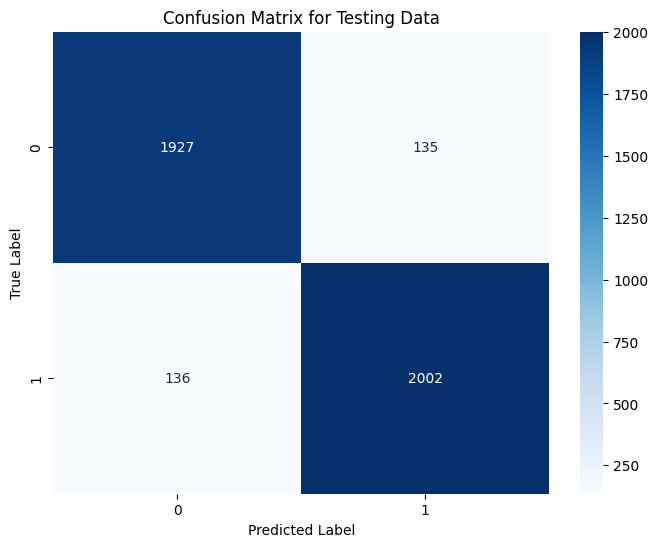

In [60]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_euclidean_test_wf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()


### Implementation of knn (Metric-manhattan) -Train Set and Test Set - With PCA. - DEFAULT

#### Default Parameter [metric-Manhattan] -TRAIN

In [61]:
# Initialize an knn with a euclidean Metric
knn_train_manhattan_f = KNeighborsClassifier(n_neighbors=99,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_f = knn_train_manhattan_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0020 seconds
Prediction time: 0.4158 seconds
Training Accuracy: 0.9504
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4938
           1       0.94      0.96      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Default Parameter [metric-Manhattan] -TEST

In [62]:
# Initialize an knn with a euclidean Metric
knn_test_manhattan_f = KNeighborsClassifier(n_neighbors=99,metric='manhattan', p=1) #sqrt

# Measure testing time
start_time = time.time()
knn_test_manhattan_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_f = knn_test_manhattan_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_f)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_f = confusion_matrix(y_test, y_test_pred_manhattan_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0020 seconds
Prediction time: 0.1161 seconds
Testing Accuracy: 0.9321
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2062
           1       0.92      0.95      0.93      2138

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



### Implementation of KNN (Manhattan) -- Train and Test Set  Without Feature Selection.- HALVING GRID SEARCH

In [63]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 95}


####  Tuning Parameter [metric=Manhattan,'n_neighbors': 95] -TRAIN

In [64]:
# Initialize an knn with a euclidean Metric
knn_train_manhattan_f = KNeighborsClassifier(n_neighbors=95,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_f = knn_train_manhattan_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0020 seconds
Prediction time: 0.4132 seconds
Training Accuracy: 0.9513
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4938
           1       0.94      0.96      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



####  Tuning Parameter [metric=Manhattan,'n_neighbors': 95] -TEST

In [65]:
# Initialize an knn with a euclidean Metric
knn_test_manhattan_f = KNeighborsClassifier(n_neighbors=95,metric='manhattan', p=1) #sqrt

# Measure testing time
start_time = time.time()
knn_test_manhattan_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_f = knn_test_manhattan_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_f)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_f = confusion_matrix(y_test, y_test_pred_manhattan_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0020 seconds
Prediction time: 0.1245 seconds
Testing Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2062
           1       0.92      0.95      0.94      2138

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



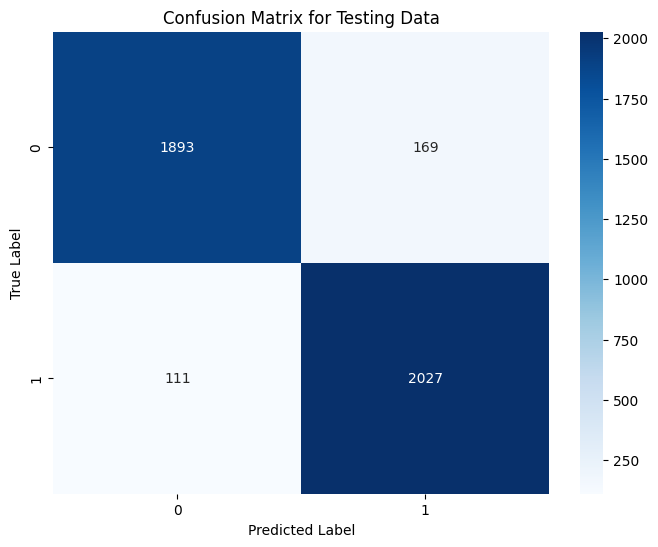

In [66]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_manhattan_test_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()

## Implementation for KNN (Cosine)

### Implementation of KNN (cosine) -Train Set & Test Set - Without Feature Selection. - Default

#### Default Parameter [metric=Cosine] -TRAIN

In [67]:
# Initialize an knn with a cosine Metric
knn_train_cosine_wf = KNeighborsClassifier(n_neighbors=99,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_wf = knn_train_cosine_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0040 seconds
Prediction time: 2.3195 seconds
Training Accuracy: 0.9449
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4938
           1       0.94      0.95      0.95      4862

    accuracy                           0.94      9800
   macro avg       0.95      0.94      0.94      9800
weighted avg       0.95      0.94      0.94      9800



#### Default Parameter [metric=Cosine] -TEST

In [68]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_wf = KNeighborsClassifier(n_neighbors=99,metric='cosine')

start_time = time.time()
knn_test_cosine_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_wf = knn_test_cosine_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_wf = confusion_matrix(y_test, y_test_pred_cosine_wf)

Testing time: 0.0030 seconds
Prediction time: 0.5529 seconds
Testing Accuracy: 0.9207
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2062
           1       0.90      0.95      0.92      2138

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



### Implementation of KNN (cosine) -Train Set & Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [69]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['cosine']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 95}


#### Tuning Parameter [metric=Cosine, 'n_neighbors': 95] -TRAIN

In [70]:
# Initialize an knn with a cosine Metric
knn_train_cosine_wf = KNeighborsClassifier(n_neighbors=95,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_wf = knn_train_cosine_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0070 seconds
Prediction time: 2.5162 seconds
Training Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4938
           1       0.94      0.95      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Tuning Parameter [metric=Cosine,'n_neighbors': 95] -TEST

In [71]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_wf = KNeighborsClassifier(n_neighbors=95,metric='cosine')

start_time = time.time()
knn_test_cosine_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_wf = knn_test_cosine_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_wf = confusion_matrix(y_test, y_test_pred_cosine_wf)

Testing time: 0.0040 seconds
Prediction time: 0.5631 seconds
Testing Accuracy: 0.9221
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2062
           1       0.90      0.95      0.93      2138

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



### Implementation of KNN (cosine) -Train Set & Test Set -With PCA - Default

#### Default Parameter [metric=Cosine] -TRAIN

In [72]:
# Initialize an knn with a euclidean Metric
knn_train_cosine_f = KNeighborsClassifier(n_neighbors=99,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_f = knn_train_cosine_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 0.0020 seconds
Prediction time: 2.6409 seconds
Training Accuracy: 0.9448
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4938
           1       0.94      0.95      0.94      4862

    accuracy                           0.94      9800
   macro avg       0.94      0.94      0.94      9800
weighted avg       0.94      0.94      0.94      9800



#### Default Parameter [metric=Cosine] -TEST

In [73]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_f = KNeighborsClassifier(n_neighbors=99,metric='cosine') #sqrt

# Measure testing time
start_time = time.time()
knn_test_cosine_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_f = knn_test_cosine_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_f)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_f = confusion_matrix(y_test, y_test_pred_cosine_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0010 seconds
Prediction time: 0.5333 seconds
Testing Accuracy: 0.9212
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2062
           1       0.90      0.95      0.92      2138

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



### Implementation of KNN (cosine) -Train Set & Test Set - With PCA. - HALVING GRID SEARCH

In [74]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [95,97],
    'metric': ['cosine']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 97}


#### Tuning Parameter [metric=Cosine, 'n_neighbors': 95] -TRAIN

In [75]:
# Initialize an knn with a euclidean Metric
knn_train_cosine_f = KNeighborsClassifier(n_neighbors=95,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_f = knn_train_cosine_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 0.0020 seconds
Prediction time: 2.4846 seconds
Training Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4938
           1       0.94      0.95      0.95      4862

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



#### Tuning Parameter [metric=Cosine,'n_neighbors': 95] -TEST

In [76]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_f = KNeighborsClassifier(n_neighbors=95,metric='cosine') #sqrt

# Measure testing time
start_time = time.time()
knn_test_cosine_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_f = knn_test_cosine_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_f)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_f = confusion_matrix(y_test, y_test_pred_cosine_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0020 seconds
Prediction time: 0.5326 seconds
Testing Accuracy: 0.9221
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2062
           1       0.90      0.95      0.93      2138

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



#NB (70:30)

In [77]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Implementation : Naive Bayes - Classification: GaussianBayes

 ### Implementation of NB (Gb) -Train Set and Test Set - Without Feature Selection. - DEFAULT

#### Default Parameter GNB - TRAIN

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
# Initialize an nb with a gb kernel
nb_train_gb_wf = GaussianNB()

# Measure training time
start_time = time.time()
nb_train_gb_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_wf = nb_train_gb_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0110 seconds
Prediction time: 0.0100 seconds
Training Accuracy: 0.7871
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      4938
           1       0.94      0.61      0.74      4862

    accuracy                           0.79      9800
   macro avg       0.83      0.79      0.78      9800
weighted avg       0.83      0.79      0.78      9800



#### Default Parameter GNB - TEST

In [80]:
# Initialize an nb with a gb kernel
nb_test_gb_wf = GaussianNB()

start_time = time.time()
nb_test_gb_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_wf = nb_test_gb_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_wf)
# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_wf = confusion_matrix(y_test, y_test_pred_gb_wf)

Testing time: 0.0100 seconds
Prediction time: 0.0090 seconds
Testing Accuracy: 0.7886
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      2062
           1       0.96      0.61      0.75      2138

    accuracy                           0.79      4200
   macro avg       0.83      0.79      0.78      4200
weighted avg       0.83      0.79      0.78      4200



 ### Implementation of NB (Gb) -Train Set and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [81]:
from sklearn.experimental import enable_halving_search_cv  # Enable the experimental feature
from sklearn.model_selection import HalvingGridSearchCV

In [82]:
# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Initialize the GaussianNB model
gnb = GaussianNB()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(gnb, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")


Best hyperparameters: {'var_smoothing': 0.01}


#### Tuning Parameter GNB - TRAIN

In [83]:
# Initialize an nb with a gb kernel
nb_train_gb_wf = GaussianNB(var_smoothing= 0.01)

# Measure training time
start_time = time.time()
nb_train_gb_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_wf = nb_train_gb_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0130 seconds
Prediction time: 0.0110 seconds
Training Accuracy: 0.7860
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      4938
           1       0.94      0.61      0.74      4862

    accuracy                           0.79      9800
   macro avg       0.83      0.78      0.78      9800
weighted avg       0.83      0.79      0.78      9800



#### Tuning Parameter GNB - TEST

In [84]:
# Initialize an nb with a gb kernel
nb_test_gb_wf = GaussianNB(var_smoothing= 0.01)

start_time = time.time()
nb_test_gb_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_wf = nb_test_gb_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_wf = confusion_matrix(y_test, y_test_pred_gb_wf)

Testing time: 0.0115 seconds
Prediction time: 0.0100 seconds
Testing Accuracy: 0.7950
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      2062
           1       0.96      0.63      0.76      2138

    accuracy                           0.80      4200
   macro avg       0.84      0.80      0.79      4200
weighted avg       0.84      0.80      0.79      4200



### Implementation of nb (Kernel-gb) -Train Set and Test Set- With LDA - DEFAULT

#### Default Parameter GNB - TRAIN

In [85]:
# Initialize an nb with a gb kernel
nb_train_gb_f = GaussianNB()

# Measure training time
start_time = time.time()
nb_train_gb_f.fit(X_train_lda, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_f = nb_train_gb_f.predict(X_train_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0020 seconds
Prediction time: 0.0010 seconds
Training Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      4938
           1       0.93      0.65      0.77      4862

    accuracy                           0.81      9800
   macro avg       0.84      0.80      0.80      9800
weighted avg       0.83      0.81      0.80      9800



#### Default Parameter GNB - TEST

In [86]:
# Initialize an nb with a gb kernel
nb_test_gb_f = GaussianNB()

# Measure testing time
start_time = time.time()
nb_test_gb_f.fit(X_test_lda, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_f = nb_test_gb_f.predict(X_test_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_f)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_f = confusion_matrix(y_test, y_test_pred_gb_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0040 seconds
Prediction time: 0.0010 seconds
Testing Accuracy: 0.8019
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      2062
           1       0.96      0.64      0.77      2138

    accuracy                           0.80      4200
   macro avg       0.84      0.80      0.80      4200
weighted avg       0.84      0.80      0.80      4200



### Implementation of nb (Kernel-gb) -Train Set and Test Set- With LDA - HALVING GRID SEARCH

In [87]:
# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Initialize the GaussianNB model
gnb = GaussianNB()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(gnb, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_lda, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")


Best hyperparameters: {'var_smoothing': 1e-05}


#### Tuning Parameter GNB - TRAIN

In [88]:
# Initialize an nb with a gb kernel
nb_train_gb_f = GaussianNB(var_smoothing = 0.0001)

# Measure training time
start_time = time.time()
nb_train_gb_f.fit(X_train_lda, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_f = nb_train_gb_f.predict(X_train_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0020 seconds
Prediction time: 0.0010 seconds
Training Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      4938
           1       0.93      0.65      0.77      4862

    accuracy                           0.81      9800
   macro avg       0.84      0.80      0.80      9800
weighted avg       0.83      0.81      0.80      9800



#### Tuning Parameter GNB - TEST

In [89]:
# Initialize an nb with a gb kernel
nb_test_gb_f = GaussianNB(var_smoothing = 0.0001)

# Measure testing time
start_time = time.time()
nb_test_gb_f.fit(X_test_lda, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_f = nb_test_gb_f.predict(X_test_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_f)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_f = confusion_matrix(y_test, y_test_pred_gb_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0030 seconds
Prediction time: 0.0000 seconds
Testing Accuracy: 0.8019
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      2062
           1       0.96      0.64      0.77      2138

    accuracy                           0.80      4200
   macro avg       0.84      0.80      0.80      4200
weighted avg       0.84      0.80      0.80      4200



# Ensemble Model (70:30)




## Ensemble - SVM, KNN, NB - Without Feature

In [90]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import Parallel, delayed
import time

### Test Set

In [91]:
# Initialize the models with better hyperparameters
svm_rbf_clf = SVC(probability=True, kernel='rbf', C=10, gamma='scale')
knn_man_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=95, p=2,weights='distance', algorithm='auto')
nb_clf = GaussianNB(var_smoothing=0.01)

# Create an ensemble using VotingClassifier with unique names
ensemble_clf = VotingClassifier(estimators=[
    ('svm_rbf', svm_rbf_clf),
    ('knn_manhattan', knn_man_clf),
    ('naive_bayes', nb_clf)
], voting='soft', n_jobs=-1)  # Use all available cores


# Measure testing time
start_time = time.time()
ensemble_clf.fit(X_test, y_test)
testing_time = time.time() - start_time

ValueError: cannot set WRITEABLE flag to True of this array

In [ ]:
# Measure prediction time
start_time = time.time()
y_test_pred = ensemble_clf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy on training data
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print('Classification Report:')
print(report)

Testing time: 2.0568 seconds
Prediction time: 1.2002 seconds
Testing Accuracy: 0.9550
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2062
           1       1.00      0.91      0.95      2138

    accuracy                           0.95      4200
   macro avg       0.96      0.96      0.95      4200
weighted avg       0.96      0.95      0.95      4200



## Ensemble - SVM, KNN, NB - With PCA


### Test Set

In [ ]:
# Initialize the models with better hyperparameters
svm_rbf_clf = SVC(probability=True, kernel='rbf', C=10, gamma='scale')
knn_man_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance', algorithm='auto')
nb_clf = GaussianNB(var_smoothing=0.01)

# Create an ensemble using VotingClassifier with unique names
ensemble_clf = VotingClassifier(estimators=[
    ('svm_rbf', svm_rbf_clf),
    ('knn_manhattan', knn_man_clf),
    ('naive_bayes', nb_clf)
], voting='soft', n_jobs=-1)  # Use all available cores
# Train the ensemble model

# Train the ensemble model
start_time = time.time()
ensemble_clf.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

In [ ]:
# Make predictions
start_time = time.time()
y_test_pred = ensemble_clf.predict(X_test_pca)
testing_time = time.time() - start_time

# Calculate accuracy on training data
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Print training accuracy
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print('Classification Report:')
print(report)

Testing time: 2.0408 seconds
Prediction time: 1.2002 seconds
Testing Accuracy: 0.9829
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2062
           1       0.97      1.00      0.98      2138

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



# Data Splitting (60:40)

In [ ]:
from sklearn.model_selection import train_test_split

# First, separate the features and the target
X = df.drop(' Label', axis=1)  # Features
y = df[' Label']               # Target

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Print the shapes of the training and test sets
print("Training set (X):", X_train.shape)
print("Training set (y):", y_train.shape)
print("Test set (X):", X_test.shape)
print("Test set (y):", y_test.shape)

Training set (X): (8400, 33)
Training set (y): (8400,)
Test set (X): (5600, 33)
Test set (y): (5600,)


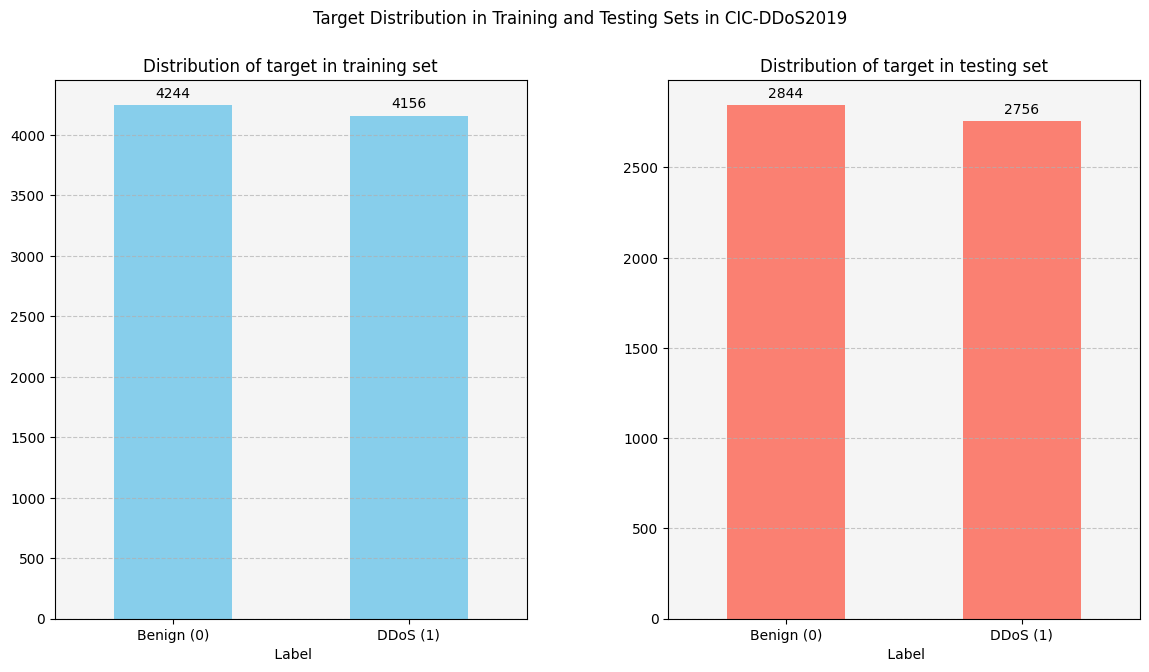

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the target in the training set
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
train_counts = y_train.value_counts()
train_bar = train_counts.plot(kind='bar', title='Distribution of target in training set', color='skyblue')
plt.xticks(rotation=0)  # Rotates X-axis labels for better visibility if needed
for i, value in enumerate(train_counts):
    plt.text(i, value + value * 0.01, f'{value}', ha='center', va='bottom')
    plt.xticks([0, 1], [ 'Benign (0)','DDoS (1)'])  # Adjusting based on your provided graph

plt.subplot(1, 2, 2)
test_counts = y_test.value_counts()
test_bar = test_counts.plot(kind='bar', title='Distribution of target in testing set', color='salmon')
plt.xticks(rotation=0)  # Rotates X-axis labels for better visibility if needed
for i, value in enumerate(test_counts):
    plt.text(i, value + value * 0.01, f'{value}', ha='center', va='bottom')
    plt.xticks([0, 1],  [  'Benign (0)','DDoS (1)'])  # Adjusting based on your provided graph

# Style enhancements
plt.subplots_adjust(wspace=0.3)  # Adjusts the space between the two subplots
plt.suptitle('Target Distribution in Training and Testing Sets in CIC-DDoS2019')  # Adds a central title if desired

# Adding grid lines for better readability
train_bar.grid(axis='y', linestyle='--', alpha=0.7)
test_bar.grid(axis='y', linestyle='--', alpha=0.7)

# Set the background color
plt.subplot(1, 2, 1).set_facecolor('whitesmoke')
plt.subplot(1, 2, 2).set_facecolor('whitesmoke')

plt.show()


# Feature Selection PCA (60:40)

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=25)

# Fit PCA on the training data
pca.fit(X_train)

# Transform the data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shape of the data after PCA
print("Training set after PCA (X):", X_train_pca.shape)
print("Test set after PCA (X):", X_test_pca.shape)

Training set after PCA (X): (8400, 25)
Test set after PCA (X): (5600, 25)


# Feature Selection LDA (60:40)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Assume X_train is a DataFrame with feature names
feature_names = X_train.columns

# Initialize LDA
lda = LDA(n_components=1)  # n_components should be less than or equal to min(n_classes - 1, n_features)

# Fit LDA on the training data
lda.fit(X_train, y_train)

# Transform the data using LDA
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Print the shape of the data after LDA
print("Training set after LDA (X):", X_train_lda.shape)
print("Test set after LDA (X):", X_test_lda.shape)



Training set after LDA (X): (8400, 1)
Test set after LDA (X): (5600, 1)


# SVM (60:40)

## Implementation : Support Vector Machine KERNEL: LINEAR

 ### Implementation of SVM (Kernel-Linear) -Train and Test Set - Without Feature Selection. - DEFAULT

#### Default Parameter [kernel = linear] - TRAIN

In [ ]:
# Initialize an SVM with a linear kernel
svm_train_linear_wf = SVC(kernel="linear")

# Measure training time
start_time = time.time()
svm_train_linear_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_wf = svm_train_linear_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_wf)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.1030 seconds
Prediction time: 0.7560 seconds
Training Accuracy: 0.8455
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4244
           1       0.91      0.76      0.83      4156

    accuracy                           0.85      8400
   macro avg       0.86      0.84      0.84      8400
weighted avg       0.86      0.85      0.84      8400



#### Default Parameter [kernel = linear] - TEST

In [ ]:
# Initialize an SVM with a linear kernel
svm_test_linear_wf = SVC(kernel="linear", C=1)

start_time = time.time()
svm_test_linear_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_wf = svm_test_linear_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_wf = confusion_matrix(y_test, y_test_pred_linear_wf)

Testing time: 1.2011 seconds
Prediction time: 0.3004 seconds
Testing Accuracy: 0.8775
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2756
           1       0.93      0.82      0.87      2844

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.88      5600
weighted avg       0.88      0.88      0.88      5600



### Implementation of SVM (Kernel-Linear) -Train and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)
halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel Linear without Feature Selection : {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Linear without Feature Selection : {'C': 10}


#### Tuning Parameter [kernel: linear, C=10] - TRAIN

In [ ]:
# Initialize an SVM with a linear kernel
svm_train_linear_wf = SVC(kernel="linear", C=10)

# Measure training time
start_time = time.time()
svm_train_linear_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_wf = svm_train_linear_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 11.4105 seconds
Prediction time: 0.6420 seconds
Training Accuracy: 0.8658
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4244
           1       0.93      0.79      0.85      4156

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.86      8400
weighted avg       0.87      0.87      0.86      8400



#### Tuning Parameter [kernel: linear, C=10] - TEST

In [ ]:
# Initialize an SVM with a linear kernel
svm_test_linear_wf = SVC(kernel="linear", C=10)

start_time = time.time()
svm_test_linear_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_wf = svm_test_linear_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_wf = confusion_matrix(y_test, y_test_pred_linear_wf)

Testing time: 2.8983 seconds
Prediction time: 0.2648 seconds
Testing Accuracy: 0.8864
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2756
           1       0.92      0.85      0.88      2844

    accuracy                           0.89      5600
   macro avg       0.89      0.89      0.89      5600
weighted avg       0.89      0.89      0.89      5600



### Implementation of SVM (Kernel-Linear) -Train Set and Test Set- With PCA - DEFAULT

#### Default Parameter [kernel = linear] - TRAIN

In [ ]:
# Initialize an SVM with a linear kernel
svm_train_linear_f = SVC(kernel="linear", C=1)

# Measure training time
start_time = time.time()
svm_train_linear_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_f = svm_train_linear_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 5.9224 seconds
Prediction time: 0.8909 seconds
Training Accuracy: 0.8458
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4244
           1       0.92      0.76      0.83      4156

    accuracy                           0.85      8400
   macro avg       0.86      0.84      0.84      8400
weighted avg       0.86      0.85      0.84      8400



#### Default Parameter [kernel = linear] - TEST

In [ ]:
# Initialize an SVM with a linear kernel
svm_test_linear_f = SVC(kernel="linear", C=1)

# Measure testing time
start_time = time.time()
svm_test_linear_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_f = svm_test_linear_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_f)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_f = confusion_matrix(y_test, y_test_pred_linear_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 1.1913 seconds
Prediction time: 0.3701 seconds
Testing Accuracy: 0.8764
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2756
           1       0.93      0.82      0.87      2844

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.88      5600
weighted avg       0.88      0.88      0.88      5600



### Implementation of SVM (Kernel-Linear) -Train and Test Set - With PCA. - HALVING GRID SEARCH

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)
halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel Linear With PCA : {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Linear With PCA : {'C': 10}


#### Tuning Parameter [kernel: linear, C=10] - TRAIN

In [ ]:
# Initialize an SVM with a linear kernel
svm_train_linear_f = SVC(kernel="linear", C=10)

# Measure training time
start_time = time.time()
svm_train_linear_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_linear_f = svm_train_linear_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_linear_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_linear_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 18.8907 seconds
Prediction time: 1.6935 seconds
Training Accuracy: 0.8676
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4244
           1       0.94      0.79      0.85      4156

    accuracy                           0.87      8400
   macro avg       0.88      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400



#### Tuning Parameter [kernel: linear, C=10] - TEST

In [ ]:
# Initialize an SVM with a linear kernel
svm_test_linear_f = SVC(kernel="linear", C=10)

# Measure testing time
start_time = time.time()
svm_test_linear_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_linear_f = svm_test_linear_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_linear_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_linear_f)

# Generate a confusion matrix for the testing data
cnf_matrix_linear_test_f = confusion_matrix(y_test, y_test_pred_linear_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 3.5723 seconds
Prediction time: 0.3382 seconds
Testing Accuracy: 0.8814
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2756
           1       0.92      0.84      0.88      2844

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.88      5600
weighted avg       0.88      0.88      0.88      5600



## Implementation : Support Vector Machine KERNEL: POLYNOMIAL

### Implementation of SVM (Kernel- Polynomial) Train and Test Set - Without Feature Selection - DEFAULT

#### Default Parameter [kernel="poly"] - TRAIN

In [ ]:
# Initialize an SVM with a poly kernel
svm_train_poly_wf = SVC(kernel="poly")

# Measure training time
start_time = time.time()
svm_train_poly_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_wf = svm_train_poly_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 3.6013 seconds
Prediction time: 1.0413 seconds
Training Accuracy: 0.8206
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      4244
           1       0.99      0.64      0.78      4156

    accuracy                           0.82      8400
   macro avg       0.87      0.82      0.81      8400
weighted avg       0.86      0.82      0.81      8400



#### Default Parameter [kernel="poly"] - TEST

In [ ]:
# Initialize an SVM with a poly kernel
svm_test_poly_wf = SVC(kernel="poly")

start_time = time.time()
svm_test_poly_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_wf = svm_test_poly_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_wf)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_wf = confusion_matrix(y_test, y_test_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)


Testing time: 1.2138 seconds
Prediction time: 0.8501 seconds
Testing Accuracy: 0.8014
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2756
           1       0.99      0.61      0.76      2844

    accuracy                           0.80      5600
   macro avg       0.85      0.80      0.79      5600
weighted avg       0.86      0.80      0.79      5600



### Implementation of SVM (Kernel-Poly) -Train and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
    'degree': [2, 3]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel Polynomial Without Feature Selection: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Polynomial Without Feature Selection: {'C': 10, 'degree': 3}


#### Tuning Parameter [kernel: poly, C=10, 'degree': 3] - TRAIN

In [ ]:
# Initialize an SVM with a poly kernel
svm_train_poly_wf = SVC(kernel="poly", C=10, degree= 3)

# Measure training time
start_time = time.time()
svm_train_poly_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_wf = svm_train_poly_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.3524 seconds
Prediction time: 0.8386 seconds
Training Accuracy: 0.8757
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4244
           1       0.98      0.76      0.86      4156

    accuracy                           0.88      8400
   macro avg       0.90      0.87      0.87      8400
weighted avg       0.89      0.88      0.87      8400



#### Tuning Parameter [kernel: poly, C=10, 'degree': 3] - TEST

In [ ]:
# Initialize an SVM with a poly kernel
svm_test_poly_wf = SVC(kernel="poly",C=10, degree= 3)

start_time = time.time()
svm_test_poly_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_wf = svm_test_poly_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_wf)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_wf = confusion_matrix(y_test, y_test_pred_poly_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)


Testing time: 1.2733 seconds
Prediction time: 0.4040 seconds
Testing Accuracy: 0.8652
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2756
           1       0.99      0.74      0.85      2844

    accuracy                           0.87      5600
   macro avg       0.89      0.87      0.86      5600
weighted avg       0.89      0.87      0.86      5600



### Implementation of SVM (Kernel-Polynomial) -Train and Test Set - With PCA. - DEFAULT

#### Default Parameter [kernel="poly"] - TRAIN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the SVM classifier with a polynomial kernel on the selected features
svm_train_poly_f = SVC(kernel="poly")

# Measure testing time
start_time = time.time()
svm_train_poly_f .fit(X_train_pca, y_train)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_f = svm_train_poly_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.3524 seconds
Prediction time: 1.9015 seconds
Training Accuracy: 0.8207
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      4244
           1       0.99      0.64      0.78      4156

    accuracy                           0.82      8400
   macro avg       0.87      0.82      0.81      8400
weighted avg       0.86      0.82      0.81      8400



#### Default Parameter [kernel="poly"] - TEST

In [ ]:
# Initialize an SVM with a poly kernel
svm_test_poly_f = SVC(kernel="poly")

# Measure testing time
start_time = time.time()
svm_test_poly_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_f = svm_test_poly_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_f)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_f = confusion_matrix(y_test, y_test_pred_poly_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 1.2196 seconds
Prediction time: 0.5519 seconds
Testing Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2756
           1       0.99      0.61      0.76      2844

    accuracy                           0.80      5600
   macro avg       0.85      0.80      0.79      5600
weighted avg       0.86      0.80      0.79      5600



### Implementation of SVM (Kernel-Poly) -Train and Test Set - With PCA - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
    'degree': [2, 3]
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel Polynomial With PCA: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel Polynomial With PCA: {'C': 10, 'degree': 3}


#### Tuning Parameter [kernel: poly,'C': 10, 'degree': 3}] - TRAIN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the SVM classifier with a polynomial kernel on the selected features
svm_train_poly_f = SVC(kernel="poly",degree=3, C=10)

# Measure testing time
start_time = time.time()
svm_train_poly_f .fit(X_train_pca, y_train)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_poly_f = svm_train_poly_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_poly_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_poly_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 4.3524 seconds
Prediction time: 1.7325 seconds
Training Accuracy: 0.8840
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4244
           1       0.98      0.78      0.87      4156

    accuracy                           0.88      8400
   macro avg       0.90      0.88      0.88      8400
weighted avg       0.90      0.88      0.88      8400



#### Tuning Parameter [kernel: poly,'C': 10, 'degree': 3}] - TEST

In [ ]:
# Initialize an SVM with a poly kernel
svm_test_poly_f = SVC(kernel="poly",degree=3, C=10)

# Measure testing time
start_time = time.time()
svm_test_poly_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_poly_f = svm_test_poly_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_poly_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_poly_f)

# Generate a confusion matrix for the testing data
cnf_matrix_poly_test_f = confusion_matrix(y_test, y_test_pred_poly_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 1.9553 seconds
Prediction time: 0.4350 seconds
Testing Accuracy: 0.8661
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2756
           1       0.98      0.75      0.85      2844

    accuracy                           0.87      5600
   macro avg       0.89      0.87      0.86      5600
weighted avg       0.89      0.87      0.86      5600



## Implementation : Support Vector Machine KERNEL: RBF

### Implementation of SVM (Kernel - RBF) - Train and Test Set - Without Feature Selection - DEFAULT

#### Default Parameter [kernel = rbf] - TRAIN

In [ ]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_wf = SVC(kernel="rbf")

# Measure training time
start_time = time.time()
svm_train_rbf_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_wf = svm_train_rbf_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.8281 seconds
Prediction time: 1.5467 seconds
Training Accuracy: 0.9054
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4244
           1       0.94      0.86      0.90      4156

    accuracy                           0.91      8400
   macro avg       0.91      0.90      0.91      8400
weighted avg       0.91      0.91      0.91      8400



#### Default Parameter [kernel = rbf] - TEST

In [ ]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_wf = SVC(kernel="rbf")

start_time = time.time()
svm_test_rbf_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_wf = svm_test_rbf_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_wf = confusion_matrix(y_test, y_test_pred_rbf_wf)

Testing time: 0.7327 seconds
Prediction time: 0.7716 seconds
Testing Accuracy: 0.9005
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2756
           1       0.95      0.85      0.90      2844

    accuracy                           0.90      5600
   macro avg       0.90      0.90      0.90      5600
weighted avg       0.90      0.90      0.90      5600



### Implementation of SVM (Kernel RBF) - Train and Test Set - Without Feature Selection - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
     'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

In [ ]:
halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters for Kernel RBF Without Feature Selection: {halving_grid_search.best_params_}")

Best hyperparameters for Kernel RBF Without Feature Selection: {'C': 10, 'gamma': 'scale'}


#### Tuning Parameter [kernel: rbf,'C': 10, 'gamma': 'scale'] - TRAIN

In [ ]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_wf = SVC(kernel="rbf", C=10, gamma='scale')

# Measure training time
start_time = time.time()
svm_train_rbf_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_wf = svm_train_rbf_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.8823 seconds
Prediction time: 2.0461 seconds
Training Accuracy: 0.9513
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4244
           1       0.97      0.93      0.95      4156

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



#### Tuning Parameter [kernel: rbf,'C': 10, 'gamma': 'scale'] - TEST

In [ ]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_wf = SVC(kernel="rbf", C=10, gamma='scale')

start_time = time.time()
svm_test_rbf_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_wf = svm_test_rbf_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_wf = confusion_matrix(y_test, y_test_pred_rbf_wf)


Testing time: 0.5741 seconds
Prediction time: 0.5544 seconds
Testing Accuracy: 0.9427
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2756
           1       0.96      0.92      0.94      2844

    accuracy                           0.94      5600
   macro avg       0.94      0.94      0.94      5600
weighted avg       0.94      0.94      0.94      5600



### Implementation of SVM (Kernel-RBF) using PCA - Train and Test set - DEFAULT





#### Default Parameter [kernel=rbf] - TRAIN

In [ ]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_f = SVC(kernel="rbf")

# Measure training time
start_time = time.time()
svm_train_rbf_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_f = svm_train_rbf_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.6514 seconds
Prediction time: 1.6315 seconds
Training Accuracy: 0.9055
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4244
           1       0.94      0.86      0.90      4156

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



#### Default Parameter [kernel=rbf] - TEST

In [ ]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_f = SVC(kernel="rbf")

# Measure testing time
start_time = time.time()
svm_test_rbf_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_f = svm_test_rbf_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_f)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_f = confusion_matrix(y_test, y_test_pred_rbf_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.7614 seconds
Prediction time: 0.7478 seconds
Testing Accuracy: 0.9007
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2756
           1       0.95      0.85      0.90      2844

    accuracy                           0.90      5600
   macro avg       0.90      0.90      0.90      5600
weighted avg       0.91      0.90      0.90      5600



### Implementation of SVM (Kernel-RBF) using PCA - Train and Test set - HALVING GRID SEARCH





In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10],
     'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm = SVC()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(svm, param_grid, cv=5, factor=2, n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters for Kernel RBF (Train Set): {halving_grid_search.best_params_}")

Best hyperparameters for Kernel RBF (Train Set): {'C': 10, 'gamma': 'auto'}


#### Tuning Parameter [kernel=rbf, C=10, gamma=auto] - TRAIN

In [ ]:
# Initialize an SVM with a rbf kernel
svm_train_rbf_f = SVC(kernel="rbf", C=10, gamma='auto')

# Measure training time
start_time = time.time()
svm_train_rbf_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_rbf_f = svm_train_rbf_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rbf_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_rbf_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 1.7083 seconds
Prediction time: 1.1944 seconds
Training Accuracy: 0.9579
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4244
           1       0.97      0.95      0.96      4156

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



#### Tuning Parameter [kernel=rbf, C=10, gamma=auto] - TEST

In [ ]:
# Initialize an SVM with a rbf kernel
svm_test_rbf_f = SVC(kernel="rbf", C=10, gamma='auto')

# Measure testing time
start_time = time.time()
svm_test_rbf_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_rbf_f = svm_test_rbf_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_rbf_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_rbf_f)

# Generate a confusion matrix for the testing data
cnf_matrix_rbf_test_f = confusion_matrix(y_test, y_test_pred_rbf_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.4826 seconds
Prediction time: 0.5198 seconds
Testing Accuracy: 0.9596
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2756
           1       0.97      0.95      0.96      2844

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600



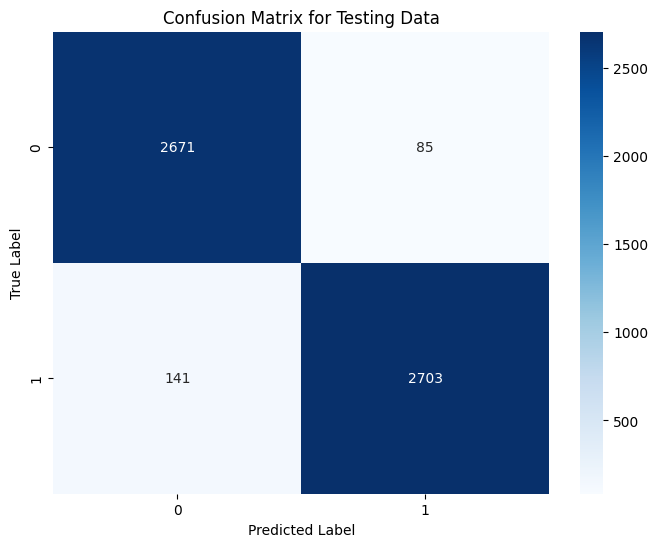

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rbf_test_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()


# KNN (60:40)

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Implementation for KNN (Euclidean)

### Implementation of KNN (Euclidean) -- Train and Test Set  Without Feature Selection.- DEFAULT

#### Default Parameter [metric=Euclidean] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_wf = KNeighborsClassifier(n_neighbors=91, metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_wf = knn_train_euclidean_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0100 seconds
Prediction time: 1.0552 seconds
Training Accuracy: 0.9405
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4244
           1       0.93      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Default Parameter [metric=Euclidean] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_wf = KNeighborsClassifier(n_neighbors=91,metric='euclidean', p=2)

start_time = time.time()
knn_test_euclidean_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_wf = knn_test_euclidean_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_wf)


# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_wf = confusion_matrix(y_test, y_test_pred_euclidean_wf)

Testing time: 0.0070 seconds
Prediction time: 0.5819 seconds
Testing Accuracy: 0.9330
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2756
           1       0.93      0.94      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



### Implementation of KNN (Euclidean) -- Train and Test Set  Without Feature Selection.- HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['euclidean']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 87}


####  Tuning Parameter [metric=Euclidean,'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_wf = KNeighborsClassifier(n_neighbors=87, metric='euclidean', p=2)

# Measure training time
start_time = time.time()
knn_train_euclidean_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_wf = knn_train_euclidean_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0094 seconds
Prediction time: 1.8671 seconds
Training Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4244
           1       0.94      0.96      0.95      4156

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



#### Tuning Parameter [metric=Euclidean'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_wf = KNeighborsClassifier(n_neighbors=87,metric='euclidean', p=2)

start_time = time.time()
knn_test_euclidean_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_wf = knn_test_euclidean_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_wf)


# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_wf = confusion_matrix(y_test, y_test_pred_euclidean_wf)

Testing time: 0.0068 seconds
Prediction time: 0.5963 seconds
Testing Accuracy: 0.9313
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2756
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



### Implementation of KNN (Metric-euclidean) -Train Set and Test Set - With PCA. - DEFAULT

#### Default Parameter [metric=Euclidean] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_f = KNeighborsClassifier(n_neighbors=91,metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_f = knn_train_euclidean_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0023 seconds
Prediction time: 1.0471 seconds
Training Accuracy: 0.9405
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4244
           1       0.93      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Default Parameter [metric=Euclidean] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_f = KNeighborsClassifier(n_neighbors=91,metric='euclidean', p=2) #sqrt

# Measure testing time
start_time = time.time()
knn_test_euclidean_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_f = knn_test_euclidean_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_f)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_f = confusion_matrix(y_test, y_test_pred_euclidean_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0041 seconds
Prediction time: 0.5639 seconds
Testing Accuracy: 0.9330
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2756
           1       0.93      0.94      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



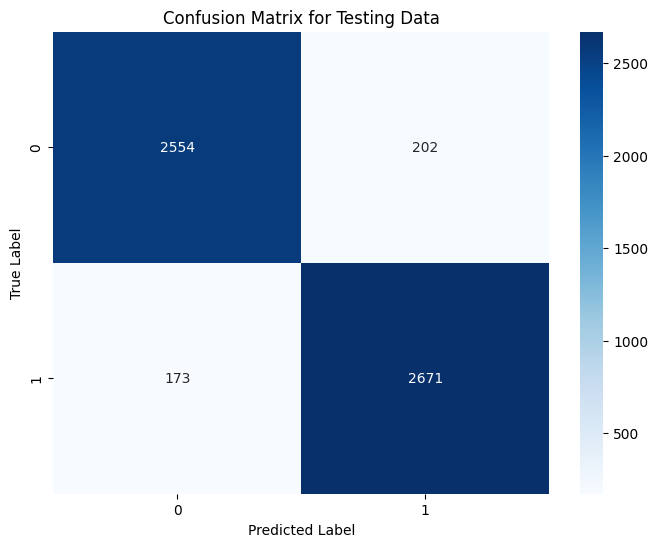

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_euclidean_test_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()

### Implementation of KNN (Euclidean) -- Train and Test Set  With PCA.- HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['euclidean']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 89}


####  Tuning Parameter [metric=Euclidean,'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_euclidean_f = KNeighborsClassifier(n_neighbors=87,metric='euclidean', p=2) #sqrt

# Measure training time
start_time = time.time()
knn_train_euclidean_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_euclidean_f = knn_train_euclidean_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_euclidean_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_euclidean_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0058 seconds
Prediction time: 1.5825 seconds
Training Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4244
           1       0.94      0.96      0.95      4156

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



#### Tuning Parameter [metric=Euclidean'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_euclidean_f = KNeighborsClassifier(n_neighbors=87,metric='euclidean', p=2) #sqrt

# Measure testing time
start_time = time.time()
knn_test_euclidean_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_euclidean_f = knn_test_euclidean_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_euclidean_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_euclidean_f)

# Generate a confusion matrix for the testing data
cnf_matrix_euclidean_test_f = confusion_matrix(y_test, y_test_pred_euclidean_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0021 seconds
Prediction time: 0.9702 seconds
Testing Accuracy: 0.9313
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2756
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



## Implementation for KNN (Manhattan)

### Implementation of KNN (Manhattan) -- Train and Test Set  Without Feature Selection.- DEFAULT

#### Default Parameter [metric-Manhattan] -TRAIN

In [ ]:
# Initialize an knn with a manhattan Metric
knn_train_manhattan_wf = KNeighborsClassifier(n_neighbors=91,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_wf = knn_train_manhattan_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0057 seconds
Prediction time: 4.2840 seconds
Training Accuracy: 0.9510
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4244
           1       0.94      0.96      0.95      4156

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



#### Default Parameter [metric=Manhattan] -TEST

In [ ]:
# Initialize an knn with a manhattan Metric
knn_test_manhattan_wf = KNeighborsClassifier(n_neighbors=91,metric='manhattan', p=1)

start_time = time.time()
knn_test_manhattan_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_wf = knn_test_manhattan_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_wf = confusion_matrix(y_test, y_test_pred_manhattan_wf)

Testing time: 0.0046 seconds
Prediction time: 1.7216 seconds
Testing Accuracy: 0.9402
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2756
           1       0.94      0.94      0.94      2844

    accuracy                           0.94      5600
   macro avg       0.94      0.94      0.94      5600
weighted avg       0.94      0.94      0.94      5600



### Implementation of KNN (Manhattan) -- Train and Test Set  Without Feature Selection.- HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 87}


####  Tuning Parameter [metric=Manhattan,'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a manhattan Metric
knn_train_manhattan_wf = KNeighborsClassifier(n_neighbors=87,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_wf = knn_train_manhattan_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0040 seconds
Prediction time: 3.6438 seconds
Training Accuracy: 0.9563
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4244
           1       0.95      0.96      0.96      4156

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



####  Tuning Parameter [metric=Manhattan,'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a manhattan Metric
knn_test_manhattan_wf = KNeighborsClassifier(n_neighbors=87,metric='manhattan', p=1)

start_time = time.time()
knn_test_manhattan_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_wf = knn_test_manhattan_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_wf = confusion_matrix(y_test, y_test_pred_manhattan_wf)

Testing time: 0.0044 seconds
Prediction time: 1.7338 seconds
Testing Accuracy: 0.9389
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2756
           1       0.94      0.94      0.94      2844

    accuracy                           0.94      5600
   macro avg       0.94      0.94      0.94      5600
weighted avg       0.94      0.94      0.94      5600



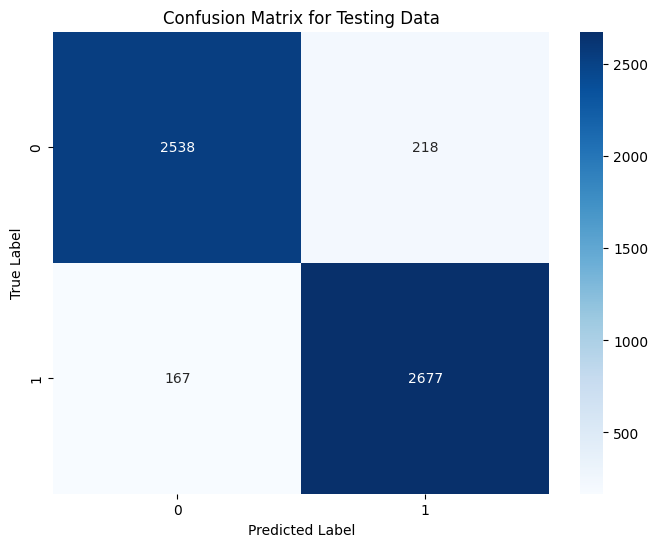

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_euclidean_test_wf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()


### Implementation of knn (Metric-manhattan) -Train Set and Test Set - With PCA. - DEFAULT

#### Default Parameter [metric-Manhattan] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_manhattan_f = KNeighborsClassifier(n_neighbors=91,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_f = knn_train_manhattan_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0040 seconds
Prediction time: 3.6160 seconds
Training Accuracy: 0.9446
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4244
           1       0.93      0.96      0.95      4156

    accuracy                           0.94      8400
   macro avg       0.95      0.94      0.94      8400
weighted avg       0.95      0.94      0.94      8400



#### Default Parameter [metric-Manhattan] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_manhattan_f = KNeighborsClassifier(n_neighbors=91,metric='manhattan', p=1) #sqrt

# Measure testing time
start_time = time.time()
knn_test_manhattan_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_f = knn_test_manhattan_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_f)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_f = confusion_matrix(y_test, y_test_pred_manhattan_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0021 seconds
Prediction time: 2.3443 seconds
Testing Accuracy: 0.9339
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2756
           1       0.92      0.95      0.94      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



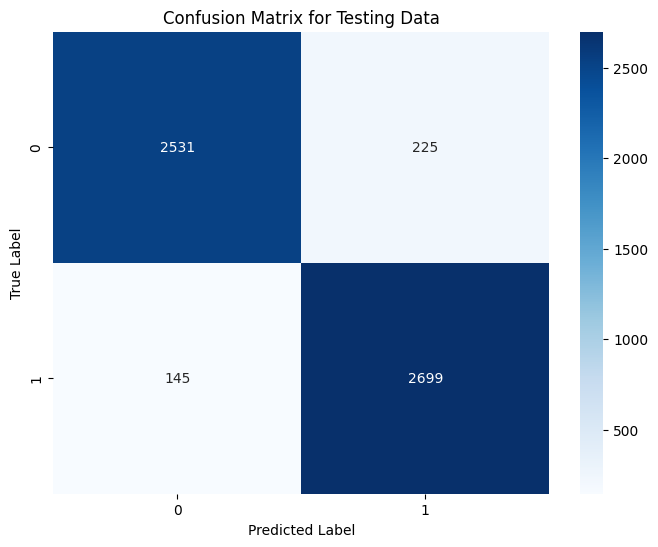

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_manhattan_test_f, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()

### Implementation of KNN (Manhattan) -- Train and Test Set  With PCA- HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['manhattan']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 87}


####  Tuning Parameter [metric=Manhattan,'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_manhattan_f = KNeighborsClassifier(n_neighbors=87,metric='manhattan', p=1) #sqrt

# Measure training time
start_time = time.time()
knn_train_manhattan_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_manhattan_f = knn_train_manhattan_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_manhattan_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_manhattan_f)
# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0017 seconds
Prediction time: 2.9560 seconds
Training Accuracy: 0.9467
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4244
           1       0.93      0.96      0.95      4156

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



####  Tuning Parameter [metric=Manhattan,'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_manhattan_f = KNeighborsClassifier(n_neighbors=87,metric='manhattan', p=1) #sqrt

# Measure testing time
start_time = time.time()
knn_test_manhattan_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_manhattan_f = knn_test_manhattan_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_manhattan_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_manhattan_f)

# Generate a confusion matrix for the testing data
cnf_matrix_manhattan_test_f = confusion_matrix(y_test, y_test_pred_manhattan_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0022 seconds
Prediction time: 2.0443 seconds
Testing Accuracy: 0.9339
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2756
           1       0.92      0.95      0.94      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



## Implementation for KNN (Cosine)

### Implementation of KNN (cosine) -Train Set & Test Set - Without Feature Selection. - Default

#### Default Parameter [metric=Cosine] -TRAIN

In [ ]:
# Initialize an knn with a cosine Metric
knn_train_cosine_wf = KNeighborsClassifier(n_neighbors=91,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_wf = knn_train_cosine_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0153 seconds
Prediction time: 3.0195 seconds
Training Accuracy: 0.9383
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4244
           1       0.92      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Default Parameter [metric=Cosine] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_wf = KNeighborsClassifier(n_neighbors=91,metric='cosine')

start_time = time.time()
knn_test_cosine_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_wf = knn_test_cosine_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)



Testing time: 0.0083 seconds
Prediction time: 1.2152 seconds
Testing Accuracy: 0.9257
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2756
           1       0.91      0.95      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



### Implementation of KNN (cosine) -Train Set & Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['cosine']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 89}


#### Tuning Parameter [metric=Cosine, 'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a cosine Metric
knn_train_cosine_wf = KNeighborsClassifier(n_neighbors=87,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_wf = knn_train_cosine_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0106 seconds
Prediction time: 3.1368 seconds
Training Accuracy: 0.9442
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4244
           1       0.93      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Tuning Parameter [metric=Cosine,'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_wf = KNeighborsClassifier(n_neighbors=87,metric='cosine')

start_time = time.time()
knn_test_cosine_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_wf = knn_test_cosine_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_wf)

# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_wf = confusion_matrix(y_test, y_test_pred_cosine_wf)

Testing time: 0.0057 seconds
Prediction time: 1.5128 seconds
Testing Accuracy: 0.9268
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2756
           1       0.91      0.95      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



### Implementation of KNN (cosine) -Train Set & Test Set -With PCA

#### Default Parameter [metric=Cosine] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_cosine_f = KNeighborsClassifier(n_neighbors=91,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_f = knn_train_cosine_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 0.0025 seconds
Prediction time: 2.5387 seconds
Training Accuracy: 0.9383
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4244
           1       0.92      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Default Parameter [metric=Cosine] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_f = KNeighborsClassifier(n_neighbors=91,metric='cosine') #sqrt

# Measure testing time
start_time = time.time()
knn_test_cosine_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_f = knn_test_cosine_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_f)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_f = confusion_matrix(y_test, y_test_pred_cosine_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0026 seconds
Prediction time: 1.0936 seconds
Testing Accuracy: 0.9261
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2756
           1       0.91      0.95      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



### Implementation of KNN (cosine) -Train Set & Test Set - With PCA. - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [87,89],
    'metric': ['cosine']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(knn, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_pca, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")

Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 87}


#### Tuning Parameter [metric=Cosine, 'n_neighbors': 87] -TRAIN

In [ ]:
# Initialize an knn with a euclidean Metric
knn_train_cosine_f = KNeighborsClassifier(n_neighbors=87,metric='cosine') #sqrt

# Measure training time
start_time = time.time()
knn_train_cosine_f.fit(X_train_pca, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_cosine_f = knn_train_cosine_f.predict(X_train_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_cosine_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_cosine_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)


Training time: 0.0025 seconds
Prediction time: 2.1984 seconds
Training Accuracy: 0.9440
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4244
           1       0.93      0.96      0.94      4156

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



#### Tuning Parameter [metric=Cosine,'n_neighbors': 87] -TEST

In [ ]:
# Initialize an knn with a euclidean Metric
knn_test_cosine_f = KNeighborsClassifier(n_neighbors=87,metric='cosine') #sqrt

# Measure testing time
start_time = time.time()
knn_test_cosine_f.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_cosine_f = knn_test_cosine_f.predict(X_test_pca)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_cosine_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_cosine_f)

# Generate a confusion matrix for the testing data
cnf_matrix_cosine_test_f = confusion_matrix(y_test, y_test_pred_cosine_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0026 seconds
Prediction time: 1.0634 seconds
Testing Accuracy: 0.9270
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2756
           1       0.91      0.95      0.93      2844

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600



# NB (60:40)

## Implementation : Naive Bayes - Classification: GaussianBayes

 ### Implementation of NB (Gb) -Train Set and Test Set - Without Feature Selection. - DEFAULT

#### Default Parameter GNB - TRAIN

In [ ]:
# Initialize an nb with a gb kernel
nb_train_gb_wf = GaussianNB()

# Measure training time
start_time = time.time()
nb_train_gb_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_wf = nb_train_gb_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0157 seconds
Prediction time: 0.0049 seconds
Training Accuracy: 0.7887
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      4244
           1       0.94      0.61      0.74      4156

    accuracy                           0.79      8400
   macro avg       0.83      0.79      0.78      8400
weighted avg       0.83      0.79      0.78      8400



#### Default Parameter GNB - TEST

In [ ]:
# Initialize an nb with a gb kernel
nb_test_gb_wf = GaussianNB()

start_time = time.time()
nb_test_gb_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_wf = nb_test_gb_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_wf)


In [ ]:
# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0101 seconds
Prediction time: 0.0077 seconds
Testing Accuracy: 0.7836
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.82      2756
           1       0.95      0.60      0.74      2844

    accuracy                           0.78      5600
   macro avg       0.83      0.79      0.78      5600
weighted avg       0.83      0.78      0.78      5600



 ### Implementation of NB (Gb) -Train Set and Test Set - Without Feature Selection. - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Initialize the GaussianNB model
gnb = GaussianNB()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(gnb, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")


Best hyperparameters: {'var_smoothing': 0.01}


#### Tuning Parameter GNB - TRAIN

In [ ]:
# Initialize an nb with a gb kernel
nb_train_gb_wf = GaussianNB(var_smoothing = 0.01)

# Measure training time
start_time = time.time()
nb_train_gb_wf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_wf = nb_train_gb_wf.predict(X_train)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_wf)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_wf)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0121 seconds
Prediction time: 0.0047 seconds
Training Accuracy: 0.7876
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      4244
           1       0.94      0.61      0.74      4156

    accuracy                           0.79      8400
   macro avg       0.83      0.79      0.78      8400
weighted avg       0.83      0.79      0.78      8400



#### Tuning Parameter GNB - TEST

In [ ]:
# Initialize an nb with a gb kernel
nb_test_gb_wf = GaussianNB(var_smoothing = 0.01)

start_time = time.time()
nb_test_gb_wf.fit(X_test, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_wf = nb_test_gb_wf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_wf)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_wf)


In [ ]:
# Print the time taken for training and prediction
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0105 seconds
Prediction time: 0.0046 seconds
Testing Accuracy: 0.7837
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.82      2756
           1       0.95      0.61      0.74      2844

    accuracy                           0.78      5600
   macro avg       0.83      0.79      0.78      5600
weighted avg       0.83      0.78      0.78      5600



### Implementation of nb (Kernel-gb) -Train Set and Test Set- With LDA - DEFAULT

#### Default Parameter GNB - TRAIN

In [ ]:
# Initialize an nb with a gb kernel
nb_train_gb_f = GaussianNB()

# Measure training time
start_time = time.time()
nb_train_gb_f.fit(X_train_lda, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_f = nb_train_gb_f.predict(X_train_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0030 seconds
Prediction time: 0.0011 seconds
Training Accuracy: 0.8093
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      4244
           1       0.93      0.66      0.77      4156

    accuracy                           0.81      8400
   macro avg       0.84      0.81      0.80      8400
weighted avg       0.84      0.81      0.80      8400



#### Default Parameter GNB - TEST

In [ ]:
# Initialize an nb with a gb kernel
nb_test_gb_f = GaussianNB()

# Measure testing time
start_time = time.time()
nb_test_gb_f.fit(X_test_lda, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_f = nb_test_gb_f.predict(X_test_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_f)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_f = confusion_matrix(y_test, y_test_pred_gb_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0043 seconds
Prediction time: 0.0020 seconds
Testing Accuracy: 0.8018
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      2756
           1       0.96      0.64      0.77      2844

    accuracy                           0.80      5600
   macro avg       0.84      0.80      0.80      5600
weighted avg       0.84      0.80      0.80      5600



### Implementation of nb (Kernel-gb) -Train Set and Test Set- With LDA - HALVING GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Initialize the GaussianNB model
gnb = GaussianNB()

# Initialize HalvingGridSearchCV for faster results
halving_grid_search = HalvingGridSearchCV(gnb, param_grid, cv=5, factor=2,  n_jobs=-1)

halving_grid_search.fit(X_train_lda, y_train)

print(f"Best hyperparameters: {halving_grid_search.best_params_}")


Best hyperparameters: {'var_smoothing': 0.0001}


#### Tuning Parameter GNB - TRAIN

In [ ]:
# Initialize an nb with a gb kernel
nb_train_gb_f = GaussianNB(var_smoothing=1e-05)

# Measure training time
start_time = time.time()
nb_train_gb_f.fit(X_train_lda, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_train_pred_gb_f = nb_train_gb_f.predict(X_train_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_gb_f)

# Classification report
class_report = classification_report(y_train, y_train_pred_gb_f)

# Print the time taken for training and prediction
print(f"Training time: {training_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
# Print classification report
print("Classification Report:")
print(class_report)

Training time: 0.0032 seconds
Prediction time: 0.0011 seconds
Training Accuracy: 0.8093
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      4244
           1       0.93      0.66      0.77      4156

    accuracy                           0.81      8400
   macro avg       0.84      0.81      0.80      8400
weighted avg       0.84      0.81      0.80      8400



#### Tuning Parameter GNB - TEST

In [ ]:
# Initialize an nb with a gb kernel
nb_test_gb_f = GaussianNB(var_smoothing=1e-05)

# Measure testing time
start_time = time.time()
nb_test_gb_f.fit(X_test_lda, y_test)
testing_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_test_pred_gb_f = nb_test_gb_f.predict(X_test_lda)
prediction_time = time.time() - start_time

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_gb_f)

# Classification report
class_report = classification_report(y_test, y_test_pred_gb_f)

# Generate a confusion matrix for the testing data
cnf_matrix_gb_test_f = confusion_matrix(y_test, y_test_pred_gb_f)

print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")


print(f"Testing Accuracy: {test_accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(class_report)

Testing time: 0.0030 seconds
Prediction time: 0.0017 seconds
Testing Accuracy: 0.8018
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      2756
           1       0.96      0.64      0.77      2844

    accuracy                           0.80      5600
   macro avg       0.84      0.80      0.80      5600
weighted avg       0.84      0.80      0.80      5600



# Ensemble Model (60:40)




## Ensemble - SVM, KNN, NB - Without Feature

### Test Set

In [ ]:
# Initialize the models with better hyperparameters
svm_rbf_clf = SVC(probability=True, kernel='rbf', C=10, gamma='auto')
knn_man_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=87, weights='distance', algorithm='auto')
nb_clf = GaussianNB(var_smoothing=1e-05)

# Create an ensemble using VotingClassifier with unique names
ensemble_clf = VotingClassifier(estimators=[
    ('svm_rbf', svm_rbf_clf),
    ('knn_manhattan', knn_man_clf),
    ('naive_bayes', nb_clf)
], voting='soft', n_jobs=-1)  # Use all available cores
# Train the ensemble model

# Train the ensemble model
start_time = time.time()
ensemble_clf.fit(X_test, y_test)
testing_time = time.time() - start_time

In [ ]:
# Make predictions
start_time = time.time()
y_test_pred = ensemble_clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate accuracy on training data
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Print training accuracy
# Print training accuracy
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print('Classification Report:')
print(report)

Testing time: 3.3348 seconds
Prediction time: 0.0017 seconds
Testing Accuracy: 0.9621
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2756
           1       1.00      0.93      0.96      2844

    accuracy                           0.96      5600
   macro avg       0.96      0.96      0.96      5600
weighted avg       0.96      0.96      0.96      5600



## Ensemble - SVM, KNN, NB - With Feature Selection

### Test Set

In [ ]:
# Initialize the models with better hyperparameters
svm_rbf_clf = SVC(probability=True, kernel='rbf', C=10, gamma='auto')
knn_man_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=87, weights='distance', algorithm='auto')
nb_clf = GaussianNB(var_smoothing=1e-05)

# Create an ensemble using VotingClassifier with unique names
ensemble_clf = VotingClassifier(estimators=[
    ('svm_rbf', svm_rbf_clf),
    ('knn_manhattan', knn_man_clf),
    ('naive_bayes', nb_clf)
], voting='soft', n_jobs=-1)  # Use all available cores
# Train the ensemble model

# Train the ensemble model
start_time = time.time()
ensemble_clf.fit(X_test_pca, y_test)
testing_time = time.time() - start_time

In [ ]:
# Make predictions
start_time = time.time()
y_test_pred = ensemble_clf.predict(X_test_pca)
testing_time = time.time() - start_time

# Calculate accuracy on training data
test_accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Print training accuracy
# Print training accuracy
print(f"Testing time: {testing_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print('Classification Report:')
print(report)

Testing time: 1.7334 seconds
Prediction time: 0.0017 seconds
Testing Accuracy: 0.9811
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2756
           1       0.96      1.00      0.98      2844

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600

